# Frekvencia slov v románe Biela veľryba
### (cvičenie)

## 1. Nástroje pre spracovanie textu
<p><img style="float: right ; margin: 5px 20px 5px 10px; width: 35%" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_38/img/Moby_Dick_p510_illustration.jpg"> </p>
<p>Aké sú najčastejšie slová v románe Hermana Melvilla Bieľa veľryba (Moby Dick) a ako často sa vyskytujú?</p>
<p>V tomto cvičení budeme analyzovať román <em>Bieľa veľryba</em>. Text knihy nájdeme na stránke <a href="https://www.gutenberg.org/">Project Gutenberg</a> (ktorá obsahuje veľké množstvo kníh). Analýzu vykonáme pomocou knižnice <code>requests</code>. Pre extrakciu slov z html (odfiltrovanie html značiek)použijeme knižnicu <code>BeautifulSoup</code>. Nakoniec, pre prácu so slovami použijeme Natural Language ToolKit (<code>nltk</code>). </p>
<p>Postup vykonaný v tejto úlohe je možné samozrejme použiť na vizualizáciu početnosti jednotlivých slov v akomkoľvek románe, ktorý sa nachádza na projekte Gutenberg, resp. po "menších úpravách" kdekoľvek na webe. Nástroje na spracovanie prirodzeného jazyka, ktoré použijeme, sa týkajú veľkého množstva údajov. S týmito nástrojmi sa stretávajú vedci z oblasti dátovej analýzy, keďže veľká časť svetových údajov predstavuje neštruktúrované údaje obsahujúce množstvo textu.
</p><br><br>
<p>Príklad je preložený a upravený z projektu <a href="https://www.datacamp.com">https://www.datacamp.com</a></p>

### <span style="color:#ff4400">Úloha:</span>
<blockquote>
    Importujte tri pythonové knižnice, ktoré použijete v tomto projekte:

<br>- <code>requests</code> pre požiadavky HTTP protokolu na iné webové stránky,
<br>- <code>BeautifulSoup</code> pre extrahovanie slov (čistého textu) z html kódu,
<br>- <code>nltk</code>pre analýzu textu.

<br>Knižnice <code>requests</code> a <code>nltk</code> je možné importovať pomocou bežného importného príkazu, ale <code>BeautifulSoup</code> je súčasťou modulu <code>bs4</code> a musí byť importovaná nasledovne:
<br><br>
<code>from bs4 import BeautifulSoup</code>

</blockquote>

In [10]:
# import knižníc requests, BeautifulSoup (from bs4) a nltk
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
import requests

## 2. Získanie obsahu románu
<p>Aby sme mohli analyzovať román Biela veľryba, musíme niekde získať jeho obsah. Text je voľne k dispozícii online v projekte Gutenberg ako súbor HTML: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm.</p>
<p>
Na načítanie súboru HTML môžeme používať knižnicu  <code>request</code> vhodnú pre tvorbu požiadaviek GET na webovú stránku. To, čo robí webový prehliadač pri návšteve webovej stránky, teraz získame priamo v Pythone.</p>

### <span style="color:#ff4400">Úloha 2:</span>
<blockquote>
    Získajte HTML súbor s románom Biela veľryba
<br>- použite funkciu <code>requests.get</code> na získanie nasledujúcej URL adresy a priraďte ju do premennej  <code>r</code>,<br>
    <code>https://www.gutenberg.org/files/2701/2701-h/2701-h.htm</code>
<br>- Pomocou vytvorenej premennej/objektu <code>r</code> extrahujete zdrojový kód (spolu s textom) webovej stránky,
<br>- Pomocou funkcie <code>print</code> zobrazte prvých 2000 znakov html kódu románu
</blockquote>
<strong> Pomocník:</strong> informácie o používaní knižnice <code>requests</code> nájdete na stránke <a href="http://docs.python-requests.org/en/master/user/quickstart/#response-content" target="_blank"> The request kickstart guide</a>    

In [4]:
# získanie HTML verzie románu Biela veľryba 
r = requests.get("https://www.gutenberg.org/files/2701/2701-h/2701-h.htm")

# Nastavenie správneho kódovania HTML stránky
r.encoding = 'utf-8'

# Extrahovanie HTML z objektu request
html = r.text

# Print prvých 2000 znakov z html
print(html[:2000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of Moby Dick; Or the Whale, by Herman Melville</title>

<style type="text/css" xml:space="preserve">

    body {margin-left:15%; margin-right:15%; text-align:justify }
    p { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
    pre       

## 3. Získanie textu z HTML

<p>HTML nie je úplne to, čo chceme. Obsahuje však to, čo chceme: text románu Biela veľryba. Aktuálne je preto potrebné extrahovať z HMTL iba samotný text románu. Za týmto účelom použijeme balík <code>BeautifulSoup</code>.
</p>
<p>
Prečo sa balík volá <em> Beautiful Soup?</em> Pri vývoji webových stránok termín "tag soup" (tagová/značková polievka) označuje štrukturálne alebo syntakticky nesprávny HTML kód. <em> Beautiful Soup</em> preto robí krásnu polievku, t.j. ľahko extrahuje informácie, vrátane čistého textu, z HTML. Na extrahovanie textu použiť metódu <code>.get_text()</code>.

### <span style="color:#ff4400">Úloha 3:</span>
<blockquote>
    Extrahujte (čístý) text z HTML verzie knihy
<br>- vytvorte objekt <code>BeautifulSoup</code> z <code>html</code> a priraďte ho do <code>soup</code>
<br>- extrahujte text z objektu <code>soup</code> a priraďte ho do <code>text</code>,
<br>- Pomocou funkcie <code>print</code> vypíšte znaky od pozície 32000 až po pozíciu znaku 3400
</blockquote>
<strong> Pomocník:</strong> Pre informácie o prvých krokoch a používaní knižnice <code>BeautifulSoup</code> na čítanie a extrakciu textu si môžete preštudovať rýchly manuál knižnice <a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/#quick-start" target="_blank"> BeautifulSoup - quick start</a>, zvlášť metódy <code>BeautifulSoup</code> a <code>.get_text()</code>.

In [7]:
# Vytvorenie objektu BeautifulSoup z HTML
soup = BeautifulSoup(html, 'html.parser')

# získanie textu románu z objektu soup
text = soup.getText()

# Print znakov medzi pozíciou 32000 a 34000
print(text[32000:34000])

  harpooneer is striking the whale!” —Nantucket Song.
      

     “Oh, the rare old Whale, mid storm and gale
     In his ocean home will be
     A giant in might, where might is right,
     And King of the boundless sea.”
      —Whale Song.





 





      CHAPTER 1. Loomings.
    

      Call me Ishmael. Some years ago—never mind how long precisely—having
      little or no money in my purse, and nothing particular to interest me on
      shore, I thought I would sail about a little and see the watery part of
      the world. It is a way I have of driving off the spleen and regulating the
      circulation. Whenever I find myself growing grim about the mouth; whenever
      it is a damp, drizzly November in my soul; whenever I find myself
      involuntarily pausing before coffin warehouses, and bringing up the rear
      of every funeral I meet; and especially whenever my hypos get such an
      upper hand of me, that it requires a strong moral principle to prevent me
      from 

## 4. Extrakcia slov
<p>Aktuálne máme v premennej s názvom <code>text</code> celý obsah/text románu! Môžeme si všimnúť, že okrem textu sa tu v úvode nachádza aj obsah, ktorý s textom románu nesúvisí. Jeho odstraňovanie by nám ale mohlo zabrať veľa času.Keďže je to v porovnaní s románom pomerne krátky text, je zrejemé, že výsledné analýzy prakticky nijako neovplyvní</p>
<p>
Ďalšou úlohou bude spočítať, koľkokrát sa každé slovo nachádza v texte. Pre riešenie tejto úlohy použijeme knižnicu <code>nltk</code> – the Natural Language Toolkit. Prvým krokom bude tokenizácia textu, pomocou ktorej rozdelíme text na  zoznam slov.</p>

### <span style="color:#ff4400">Úloha 4:</span>
<blockquote>
    Tokenizácia textu románu Biela veľryba
<br>- vytvorte <code>tokenizer</code>  objekt použitím metódy <code>nltk.tokenize.RegexpTokenizer</code>, ktorá zo vstupného textu vytvorí tokeny
<br>- použite funkciu <code>tokenizer.tokenize</code> na premennú <code>text</code> a výsledný zoznam slov/tokenov priraďte do <code>tokens</code>,
<br>- Vypíšte prvých 8 slov/tokenov vytvoreného zoznamu
</blockquote>
<strong> Pomocník:</strong> Informácie o tom, ako používať funkciu <code>nltk.tokenize.RegexpTokenizer</code>, nájdete v príklade v nltk dokumentácii - <a href="http://www.nltk.org/api/nltk.tokenize.html?highlight=regexp#module-nltk.tokenize.regexp" target="_blank"> dokumentácia NLTK</a>.
<br>Funkcia  <code>nltk.tokenize.RegexpTokenizer</code> vyžaduje ako prvý argument regulárny výraz alebo krátky regexp. Ak chcete priradiť slová, použite parameter <code>'\ w +'</code>. 
- '\ w' je špeciálny znak, ktorý charakteriyuje alfanumerické znaky A-z, a-z, 0-9.
- znak "+" označuje, že predchádzajúci znak v regexp sa môže vyskytovať ľubovolný počet krát z danom reťazci.<br><br>
To znamená, že '\ w +' sa zhoduje s ľubovoľnými sekvenciami alfanumerických znakov.

In [15]:
# vytvorenie objektu tokenizer
tokenizer = RegexpTokenizer('\w+')

# tokenizácia textu
tokens = tokenizer.tokenize(text)

# Výpis prvých 8 slov/tokenov 
print(tokens[:8])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Moby', 'Dick', 'Or']


## 5. Prevod textu na malé písmená
<p>Pri výpise všetkým tokenov (resp. prvých ôsmych) je možné pozorovať, že niektoré slová začínajú veľkým písmenom, napr. "Or" a pod. Z hľadiska porovnateľnosti (aby "Or" a "or" bol ten istý token) by sme mali vytvoriť zoznam slov/tokenov, ktoré by všetky boli písané malým písmom. </p>

### <span style="color:#ff4400">Úloha 5:</span>
<blockquote>
    Preveďte všetky slová/tokeny na malé písmená
<br>- upravte všetky slová z <code>tokens</code>, preveďte ich na malé písmená  a priraďte ich do <code>words</code>
<br>- Vypíšte prvých 8 slov, aby ste sa uistili, že sú všetky malé.
</blockquote>
<strong> Pomocník:</strong> V tejto úlohe môžete použiť funkciu <code>.lower()</code>

In [17]:
# nový zoznam pre uchovávanie upravených slov
words = []

# Prejdenie všetkých tokens, konverzia na malé písmená a vloženie do nového zoznamu
for word in tokens:
  words.append(word.lower())
    
# Výpis prvých 8 slov / tokenov 
print(words[:8])

['the', 'project', 'gutenberg', 'ebook', 'of', 'moby', 'dick', 'or']


## 6. Stop slová
<p>Bežnou praxou pri spracovaní textu je odstránenie tzv. stop slov. T.j. slov, ktoré sa často vyskytujú ale pre pochopenie texte nemajú veľký význam. Knižnica <code>nltk</code> obsahuje zoznam anglických stop slov.</p>

### <span style="color:#ff4400">Úloha 6:</span>
<blockquote>
    Načítajte zoznam anglických stop slov
<br>- načítajte zoznam stop slov z <code>nltk</code> a priraďte ich do <code>sw</code> 
<br>- Vypíšte prvých 8 stop slov z <code>sw</code> 
</blockquote>

<strong> Pomocník:</strong> Preštudujte <code>nltk</code> dokumentáciu pre zistenie ako načítať stop slová - <a href="http://www.nltk.org/book/ch02.html#wordlist-corpora" target="_blank">NLTK (stop slová)</a>.
<br>Predtým, ako načítate stop slová, musíte ich stiahnuť pomocou príkazu:
<br><br>
<code>nltk.download ('stopwords')</code>

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
# získanie English stop words z knižnice nltk
from nltk.corpus import stopwords
sw = stopwords.words("english")
# výpis prvých 8 stop words
print(sw[:8])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']


## 7. Odstránenie stop slov z románu Biela veľryba
<p>Aktuálne potrebujeme vytvoriť nový zoznam so všetkými slovami - <code>words</code> v Bielej veľrybe, s výnimkou tých, ktoré sú v zozname stop slov (to sú slová uvedené v <code>sw</code>). Jedným zo spôsobov, ako získať tento zoznam, je vytvoriť nový zoznam slov <code>words_ns</code> a pridať do neho každé slovo, ktoré nie je v zozname stop slov - <code>sw</code>.

### <span style="color:#ff4400">Úloha 7:</span>
<blockquote>
    Vytvorte nový zoznam slov z románu Biela veľryba. V novom zozname sa nebudú nachádzať slová zo zoznamu stop slov
<br>- priraďte do <code>words_ns</code> všetky slová, ktoré sa nachádzajú v zozname <code>words</code> ale nepatria do <code>sw</code> 
<br>- Vypíšte prvých 5 slov z <code>words_ns</code> 
</blockquote>

<strong> Pomocník:</strong> Cieľom je vytvoriť zoznam <code>words_ns</code>, ktorý obsahuje všetky slová zo zoznamu <code>words</code> okrem stop slov.

In [20]:
# nový zoznam, v ktorom budú všetky slová románu Biela veľryba okrem Stop slov
words_ns = []

# priradenie všetkých slov, ktoré patria do words ale nie sú v sw
for word in words:
  if word not in sw:
    words_ns.append(word)

# Výpis prvých 5 prvkov words_ns pre zistenie či sa v ňom nenachádzajú stop slová
print(words_ns[:5])

['project', 'gutenberg', 'ebook', 'moby', 'dick']


## 8. Poznáme už odpoveď?
<p>Pôvodná otázka bola:</p>
<blockquote>
  <p>Aké sú najčastejšie slová v románe Hermana Melvilla Bieľa veľryba a ako často sa vyskytujú?</p>
</blockquote>
<p>Pre odpoveď môžeme vytvoriť graf frekvencií slov pomocou <code>nltk</code>. </p>

### <span style="color:#ff4400">Úloha 8:</span>
<blockquote>
    Vytvorte graf početností jednotlivých slov s využitím nltk.
<br>- vytvorte objekt početnosti slov pomocou funkcie <code>nltk.FreqDist()</code> a výsledok priraďte do premennej/objektu <code>freqdist</code> 
<br>- Použite metódu <code>plot</code> objektu <code>freqdist</code> pre zobrazenie 25 najčastejších slov v románe
</blockquote>

<strong> Pomocník:</strong> Preštudujte <code>nltk</code> dokumentáciu pre popis použitia <code>nltk.FreqDist()</code> - <a href="http://www.nltk.org/book/ch01.html#frequency-distributions" target="_blank">NLTK (FreqDist) documentation</a>.
<br>Metóda <code>plot</code> objektu <code>FreqDist</code> má ako prvý argument počet položiek (v našom prípade slov). BuUistite sa, že nastavíte tento argument, inak sa sprisahanie pokúsi vykresliť všetky slová, ktoré v prípade Moby Dick bude trvať príliš dlho.
<br><br>
<code>nltk.download ('stopwords')</code>

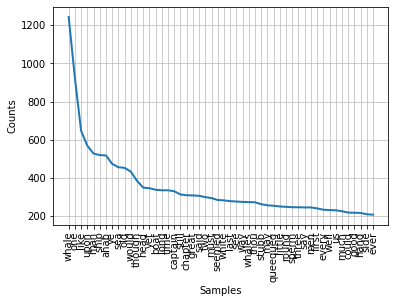

In [21]:
# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
freqdist.plot(50, cumulative=False)

## 9. Záver
<p>Rozdelenie frekvencie slov je odpoveďou na našu otázku. </p>
<p>Skúsenosti s prirodzeným spracovaním jazyka, ktoré sme v tejto úlohe uplatnili, sú tiež uplatniteľné na veľké množstvo údajov, s ktorými sa stretávajú vedeckí pracovníci v oblasti údajov, keďže obrovský podiel svetových údajov predstavuje neštruktúrované údaje hlavne vo formme množstva textu. </p>
<p>Je zrejmé, že slovo s najväčším výskytom, ktoré sme "objavili", nebude pre nikoho prekvapením!</p>

In [22]:
top_slovo = 'whale'